### Multiple Regression

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [66]:
ocean = pd.read_csv('ocean1.csv', index_col=0)
ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Salnty       2000 non-null   float64
 1   Depthm       2000 non-null   int64  
 2   T_degC       2000 non-null   float64
 3   O2ml_L       2000 non-null   float64
 4   STheta       2000 non-null   float64
 5   O2Sat        2000 non-null   float64
 6   Oxy_µmol/Kg  2000 non-null   float64
 7   Year         2000 non-null   int64  
 8   Month        2000 non-null   int64  
 9   Bottom_D     2000 non-null   float64
 10  Wea          2000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 187.5 KB


In [67]:
ocean['Interaction_O2ml_O2Sat_Oxy'] = ocean['O2ml_L'] * ocean['O2Sat'] * ocean['Oxy_µmol/Kg']
columns_to_drop = ['O2Sat', 'Oxy_µmol/Kg','O2ml_L']
ocean = ocean.drop(columns=columns_to_drop)
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')

In [68]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_25062/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_25062/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_25062/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,Depthm,T_degC,STheta,Bottom_D,Interaction_O2ml_O2Sat_Oxy,Year_2005,Year_2006,Year_2007,Year_2008,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,5.63,26.936,3935.0,213.094070,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,9.25,26.415,635.0,6061.474008,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,8.72,26.528,635.0,3570.744632,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,8.50,26.621,635.0,1146.362947,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,7.81,26.759,635.0,223.787361,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,26.573,1339.0,1993.982824,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,7.58,26.685,1339.0,911.242608,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,6.95,26.794,1339.0,239.004628,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,6.03,26.966,1339.0,39.660440,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [1.00339356]
Coefficients: 
 [[ 1.31657140e-04  1.77456960e-01  1.19096650e+00 -1.46906838e-06
   3.58227765e-07  1.03309763e-03  2.22080100e-04  3.82128811e-03
  -1.26943809e-03 -1.87115886e-03  4.49795218e-03  9.86627390e-03
   5.06664744e-01  1.62491448e-03 -2.50294631e-04  1.09932241e-03
   7.07397999e-03  1.82987505e-03  3.68003374e-02 -5.25846154e-03
   1.62195610e-03  1.44334640e-03  6.19666026e-04  9.66367701e-04
  -4.42428306e-03 -1.15266684e-04  1.68152349e-03]]
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     6132.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:38:18   Log-Likelihood:                 5625.7
No. Observations:                200

In [71]:
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.64
Mean Absolute Error: 0.008323007423951801
Mean Square Error: 0.0008465275838048951
Root Mean Square Error: 0.029095147083403706


In [72]:
# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Model performance on training set
y_train_pred = mlr.predict(x_train)
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, y_train_pred)
train_meanSqErr = metrics.mean_squared_error(y_train, y_train_pred)
train_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Square Error:', train_meanSqErr)
print('Root Mean Square Error:', train_rootMeanSqErr)

# Model performance on testing set
y_test_pred = mlr.predict(x_test)
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, y_test_pred)
test_meanSqErr = metrics.mean_squared_error(y_test, y_test_pred)
test_rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Square Error:', test_meanSqErr)
print('Root Mean Square Error:', test_rootMeanSqErr)


Training Set Performance:
R squared: 99.49
Mean Absolute Error: 0.006877953818660418
Mean Square Error: 9.391468890972374e-05
Root Mean Square Error: 0.00969095913260002

Testing Set Performance:
R squared: 94.77
Mean Absolute Error: 0.008323007423951801
Mean Square Error: 0.0008465275838048951
Root Mean Square Error: 0.029095147083403706


In [73]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features (x) and target variable (y)
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 99.52
Mean Absolute Error: 0.0068820285053524085
Mean Squared Error: 8.571994305510502e-05
Root Mean Squared Error: 0.009258506524008342

Testing Set Performance:
R squared: 93.43
Mean Absolute Error: 0.009022582909633883
Mean Squared Error: 0.001105267928825534
Root Mean Squared Error: 0.03324557006317584

Cross-Validation Scores:
R squared scores: [0.96466242 0.99420784 0.99489497 0.99402862 0.99263183]
Average R squared: 98.81
Mean Squared Error scores: [8.21155971e-04 8.53797899e-05 7.30891815e-05 1.18495791e-04
 1.35759332e-04]
Average Mean Squared Error: 0.0002


/Users/pranaylingareddy/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


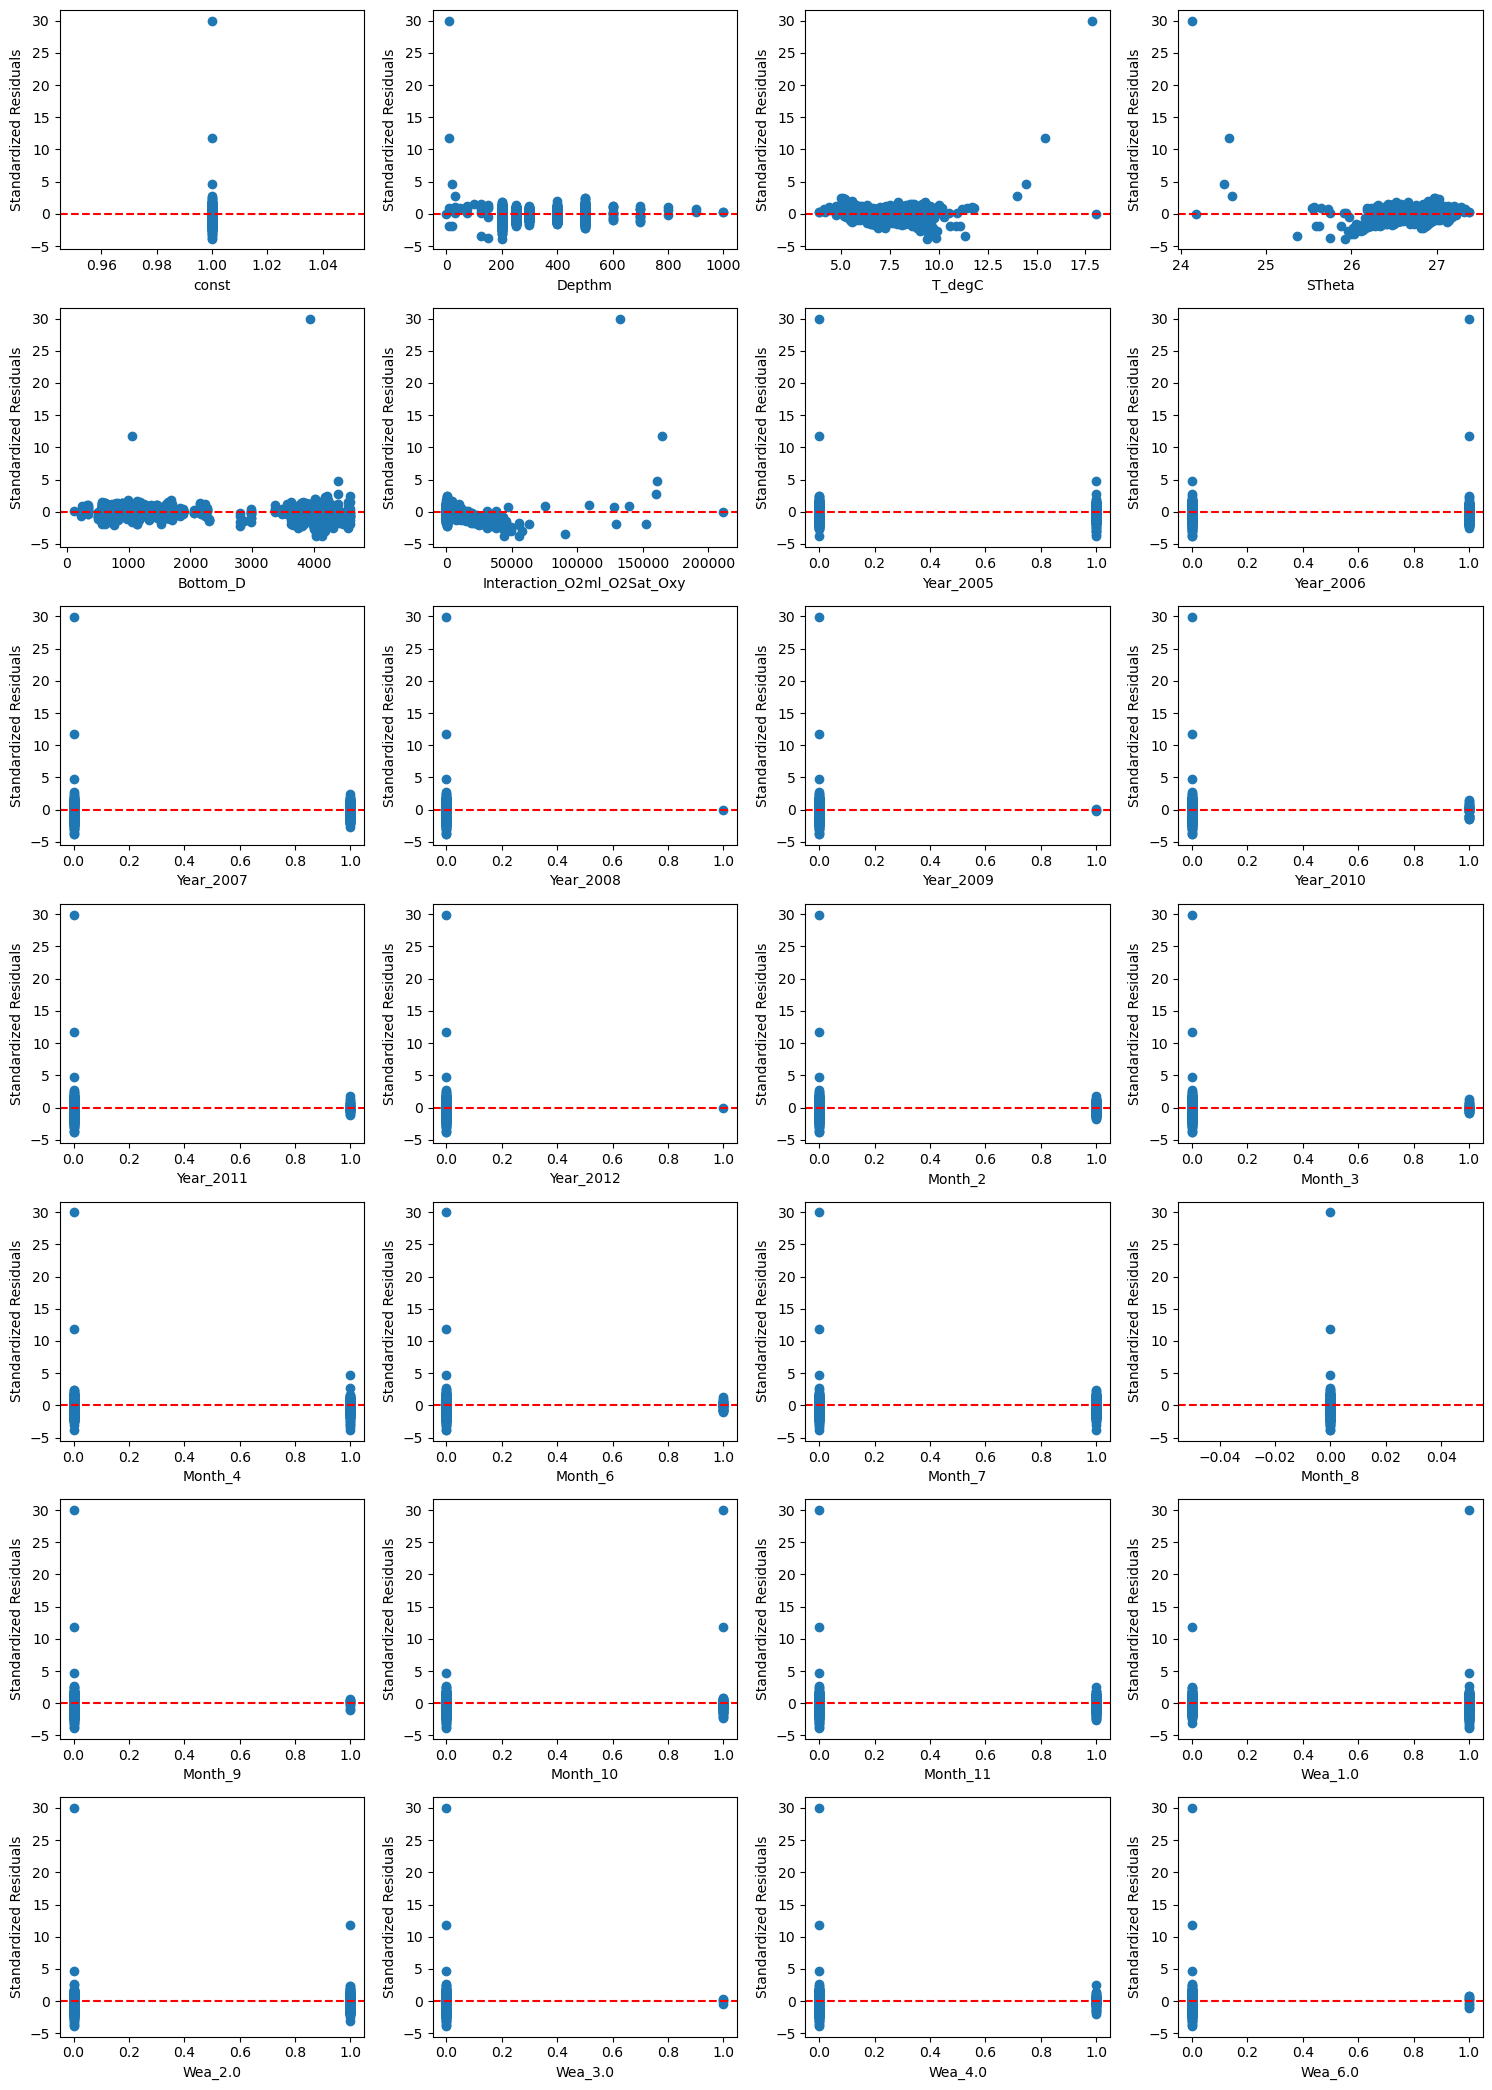

In [74]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Assuming 'x' is your DataFrame of predictor variables and 'y' is your response variable
# You need to add a constant term to the predictor variable for the intercept
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Get the standardized residuals
std_residuals = model.get_influence().resid_studentized_internal

# Plot standardized residuals against predictor variables
num_predictors = len(x.columns)
num_cols = 4  # You can adjust the number of columns based on your preference
num_rows = (num_predictors + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

for i, col in enumerate(x.columns):
    ax = axes.flatten()[i]
    ax.scatter(x[col], std_residuals)
    ax.set_xlabel(col)
    ax.set_ylabel('Standardized Residuals')
    ax.axhline(0, color='red', linestyle='--')

for j in range(num_predictors, num_cols * num_rows):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


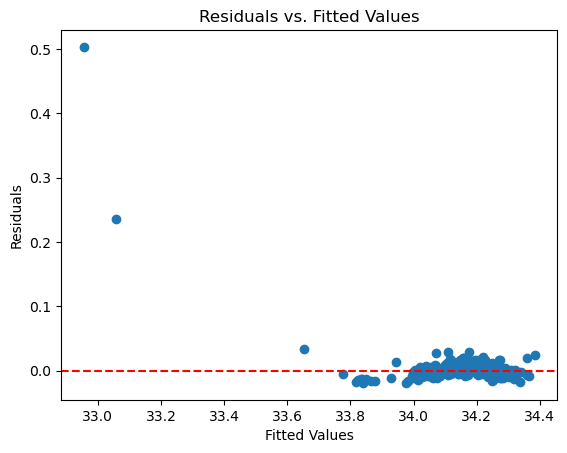

In [75]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd


# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


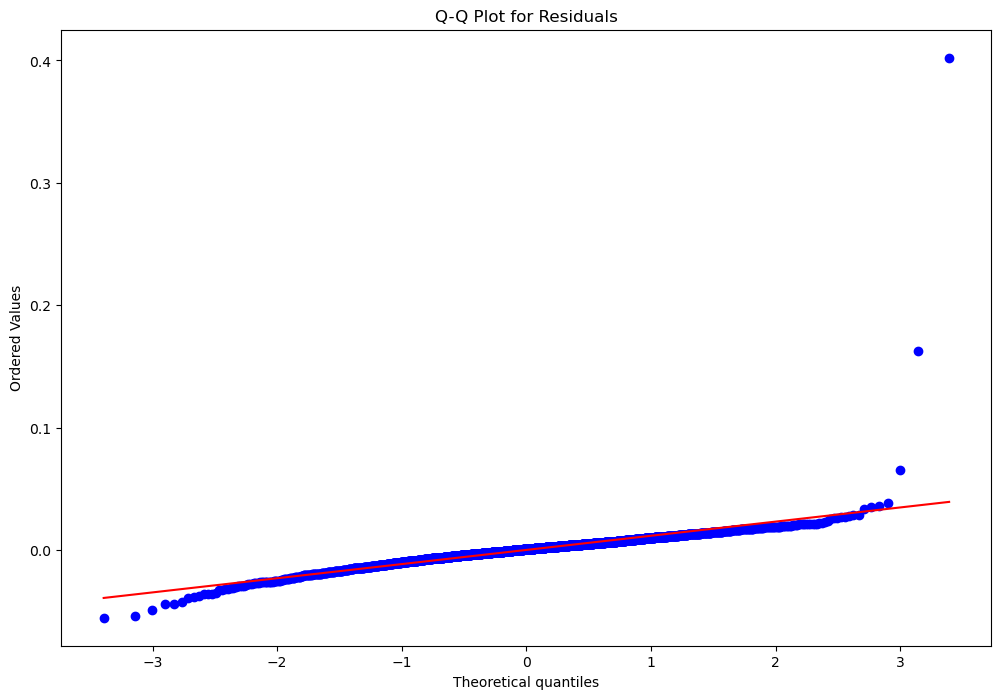

In [76]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


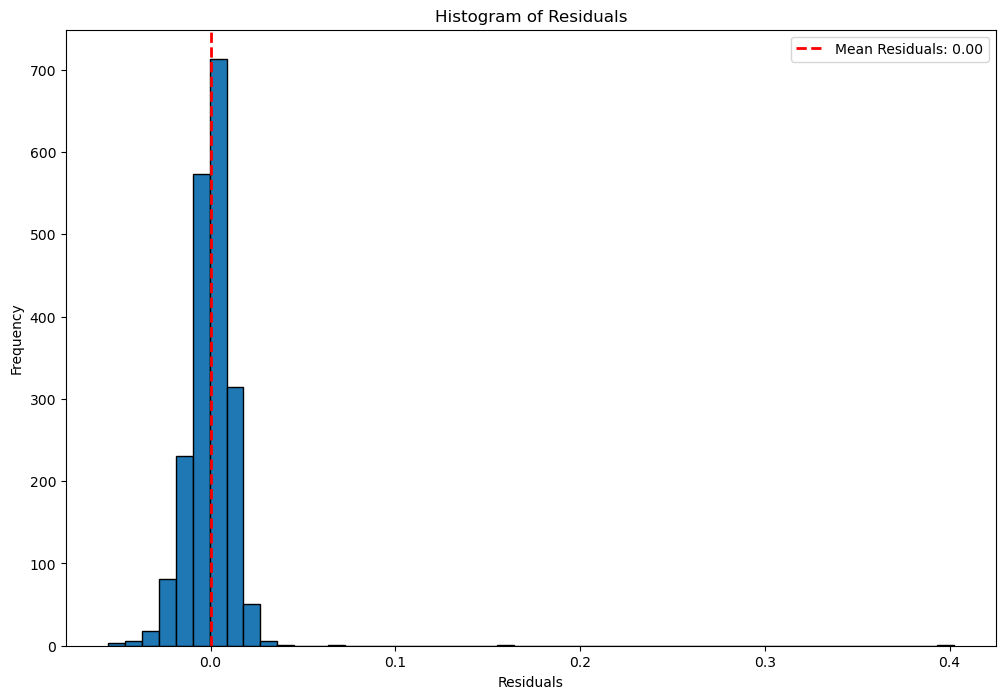

In [77]:
import matplotlib.pyplot as plt

# Assuming 'model' is your linear regression model
residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()

In [78]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
                      Variable            VIF
0                        const  473808.583488
1                       Depthm       9.609031
2                       T_degC      22.091236
3                       STheta      41.102286
4                     Bottom_D       1.890844
5   Interaction_O2ml_O2Sat_Oxy       6.582339
6                    Year_2005       3.234064
7                    Year_2006       3.943459
8                    Year_2007       3.404739
9                    Year_2008       1.022267
10                   Year_2009       1.108248
11                   Year_2010       2.092660
12                   Year_2011       1.492724
13                   Year_2012       1.371755
14                     Month_2       2.372762
15                     Month_3       1.195425
16                     Month_4       2.251660
17                     Month_6       1.145475
18                     Month_7       2.702818
19                     Month_8       1.246348
20                    

In [ ]:
›